## Experiment of L1 Regularization effect on Weights

In [3]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# Creating a Fat matrix of 50x50
N = 50
D = 50

X = (np.random.random((N,D)) -0.5)*10 # Create Random Matrix of NxD with range of -5, 5
true_w = np.array([1,0.5,-0.5]+[0]*(D-3)) # Only first 3 has values and rest is 0
y = np.dot(X, true_w) + np.random.randn(N)*0.5 # Adding a little Random Noise

In [78]:
# Experiment is to find the W which supposed to close to true_w using L1 Reg with Gradient Descent

In [79]:
# Weights Update rule 
def update_rule(w, lr, error, L1):
    w = w - (lr*np.dot(X.T, error)+L1*np.sign(w))
    return w

In [80]:
# Gradient Descent Function
def GradientDescent(X, y, w, lr, L1, iterations):
    cost= []
    
    for i in range(iterations):
        Yhat = np.dot(X, w)
        error = Yhat - y
        w = update_rule(w, lr, error, L1)
        mse = np.dot(error, error) / X.shape[0]
        cost.append(mse)
        
    return w, cost

In [81]:
# Hyperparameter Initialization
learning_rate = 0.0001
L1_term = 0.01
iterations = 100
w = np.random.randn(D) / np.sqrt(D)

In [82]:
# Apply GD
w, cost = GradientDescent(X, y, w, learning_rate, L1_term, iterations)

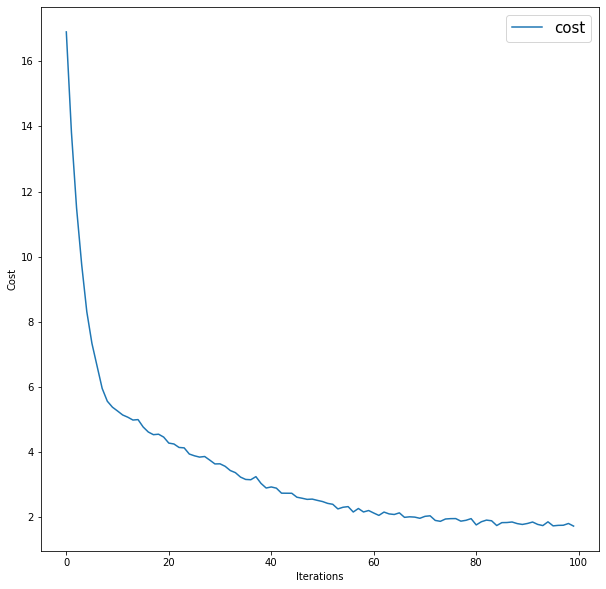

In [83]:
# Plot the Graph
plt.figure(figsize=(10,10))
plt.plot(cost, label="cost")
plt.legend(fontsize=15)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

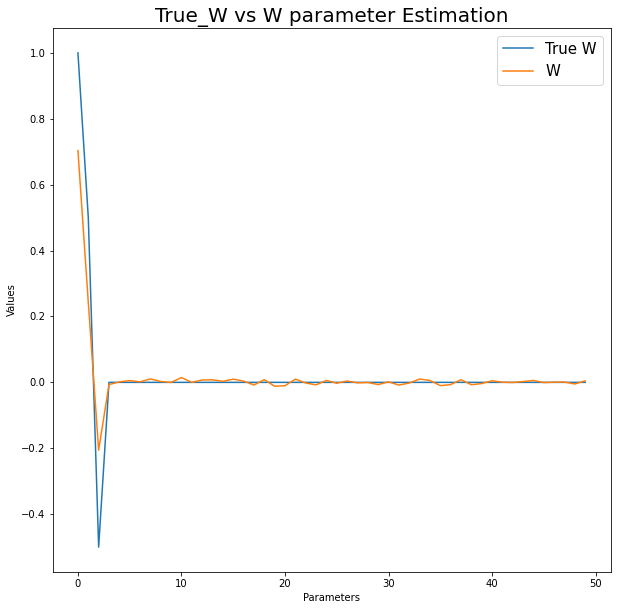

In [84]:
plt.figure(figsize=(10,10))
plt.title("True_W vs W parameter Estimation", fontsize=20)
plt.plot(true_w, label="True W")
plt.plot(w, label="W")
plt.legend(fontsize=15)
plt.xlabel("Parameters")
plt.ylabel("Values")
plt.show()

## Results are pretty close. Learnt w is much close to true_w. Only first 3 values in parameter used, rest is almost 0

Unlike in L2 Regularization which makes Weights are as smaller as possible